## Imports

In [35]:
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Data loading

In [36]:
df = pd.read_csv('no-show-hospital-data.csv')

## Data clean-up

Change data type of the PatientId variable to an integer.

In [37]:
df['PatientId'] = df.PatientId.astype(int)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Convert the target variable to binary.

In [38]:
df['No-show'] = (df['No-show'] == 'Yes').astype(int)

In [39]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


## Drop irrelevant variables

Unique appointment ID is useless for our analysis.

In [40]:
df.drop('AppointmentID', axis=1, inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


## Convert date columns to the date data type

In [41]:
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)

In [42]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


## Create days_between variable

Compute number of days between an appointment has been scheduled and it has actually taken place.

In [43]:
def days_between(x):
    start = x['ScheduledDay']
    end = x['AppointmentDay']
    delta = (end - start).days
    if delta < 0:
        return 0
    else:
        return delta

In [44]:
df['days_between'] = df.apply(days_between, axis=1)

In [45]:
df.sample(n=5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between
80910,338688922964215,F,2016-05-18 07:45:17,2016-05-20,78,ILHA DE SANTA MARIA,0,0,0,0,0,0,0,1
59986,559831968314,M,2016-04-19 10:23:35,2016-05-09,64,CENTRO,0,0,0,0,0,0,0,19
62164,5523596987515,M,2016-05-30 16:18:02,2016-05-31,36,SOLON BORGES,0,0,0,0,0,0,0,0
90523,9715135545613,F,2016-06-01 10:32:44,2016-06-01,12,ROMÃO,0,0,0,0,0,0,0,0
84759,21375724494,M,2016-06-01 14:49:51,2016-06-01,31,BONFIM,0,1,0,0,0,0,0,0


## Group neighbourhoods with few observations as Other

Group together neighbourhoods with fewer than 100 observations.

In [46]:
sizes = df.groupby('Neighbourhood').size().sort_values()
small_size = sizes[sizes < 100]
small_size

Neighbourhood
PARQUE INDUSTRIAL               1
ILHAS OCEÂNICAS DE TRINDADE     2
AEROPORTO                       8
ILHA DO FRADE                  10
ILHA DO BOI                    35
PONTAL DE CAMBURI              69
MORADA DE CAMBURI              96
dtype: int64

In [47]:
df.replace(to_replace=small_size.keys(), inplace=True, value='OTHER')

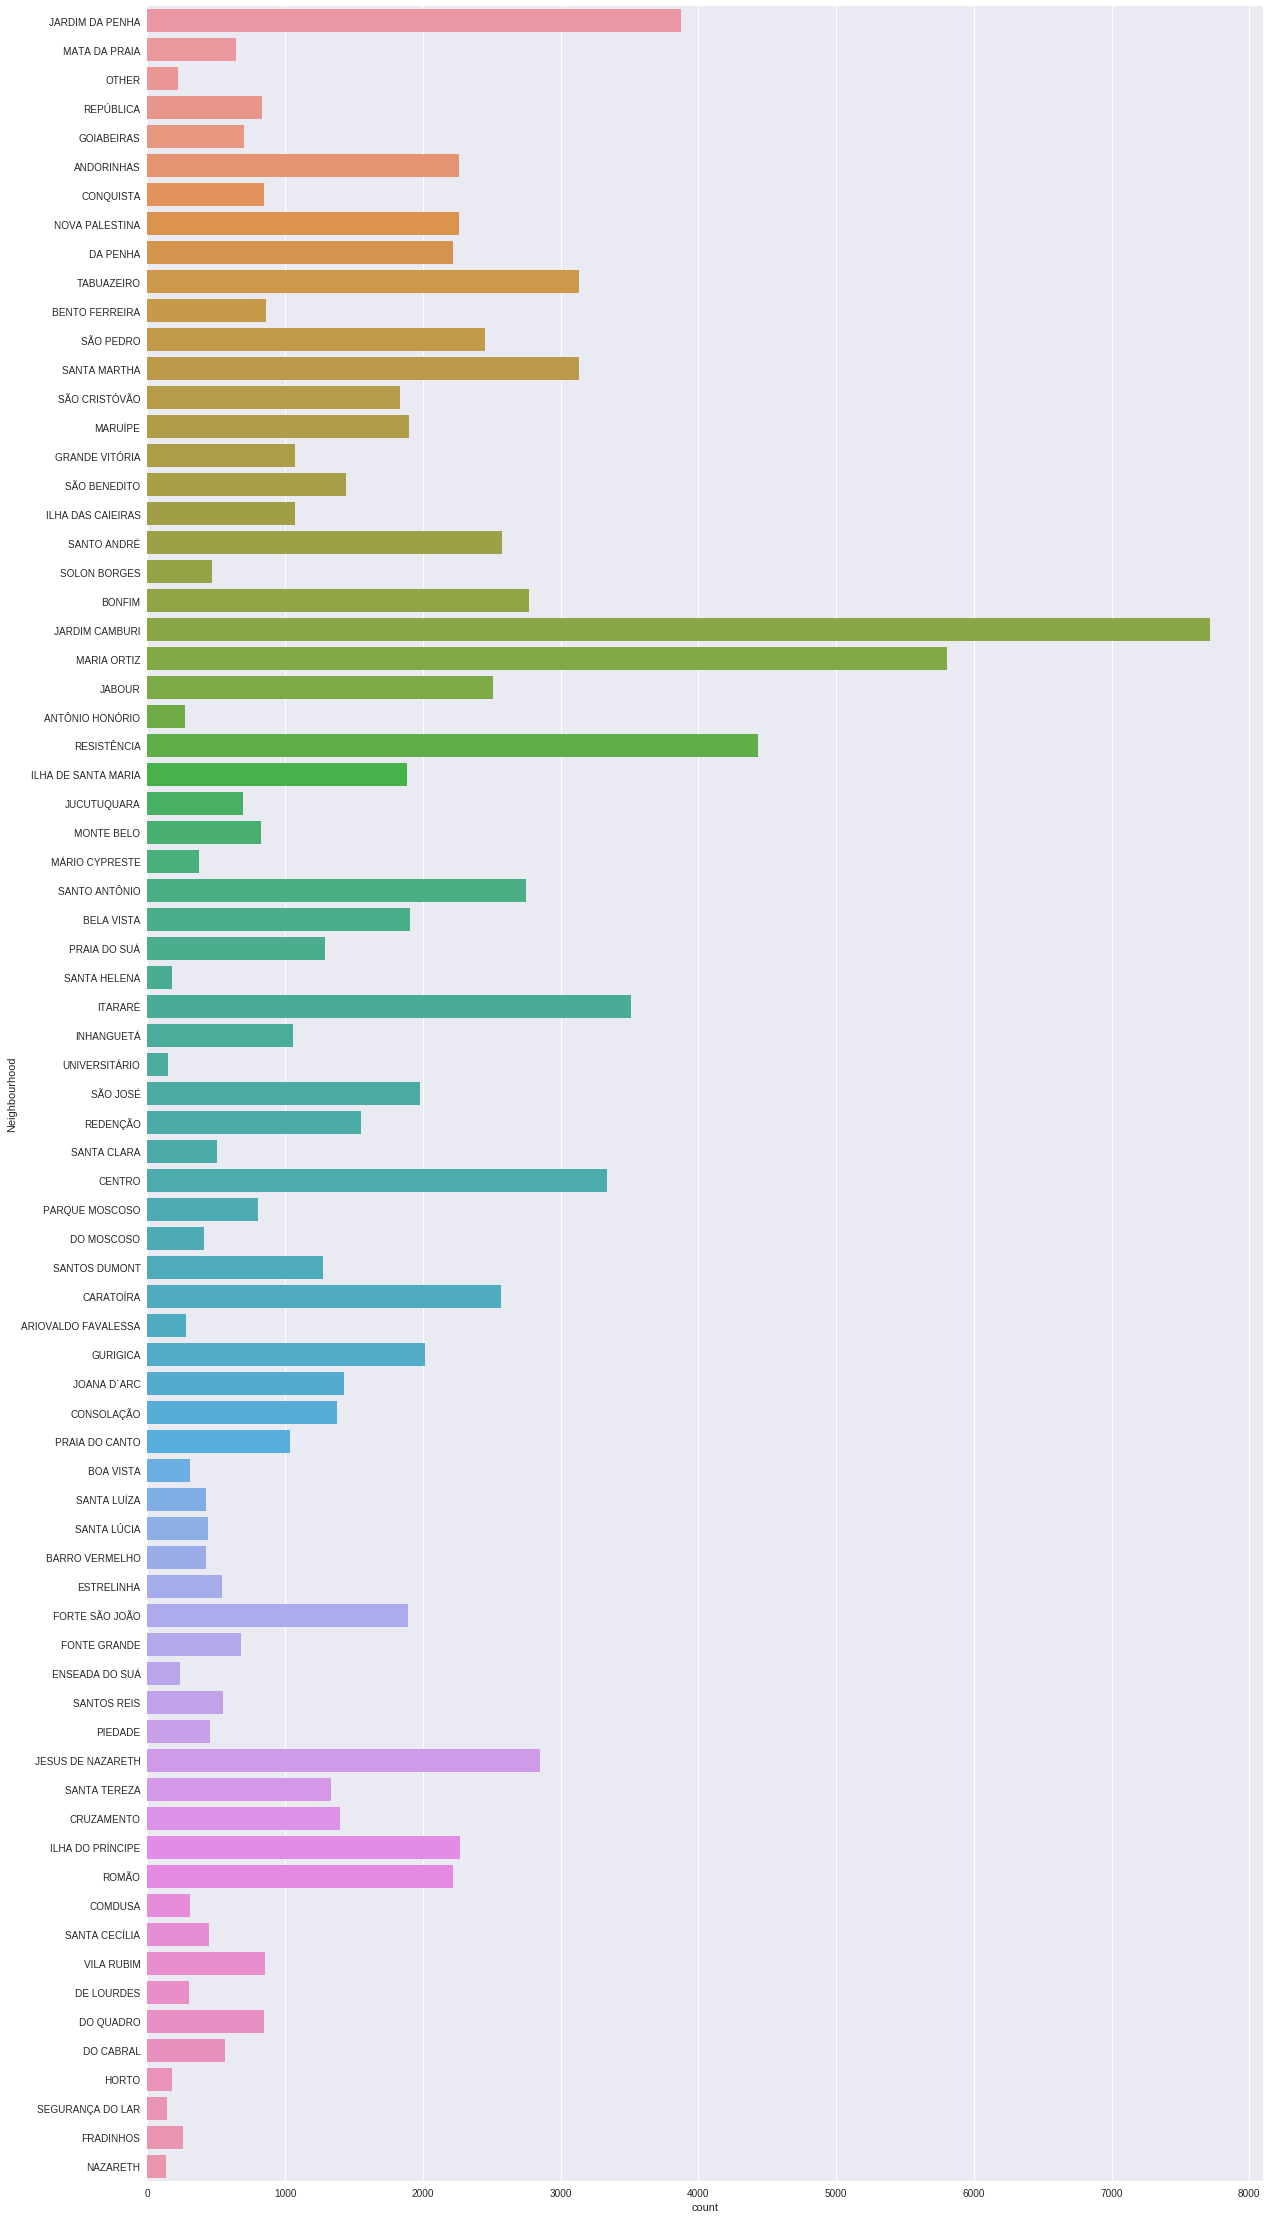

In [48]:
fig, ax = plt.subplots(figsize=(20, 40))
sns.countplot(y='Neighbourhood', data=df)
plt.show()

## Convert categorical neighbourhood variable to indicator variables

Our algorithms don't work with categorical data. Create indicator variables. Possibly, dimensionality reduction is called for.

In [49]:
df = pd.get_dummies(df, columns=['Neighbourhood'])
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## No-show based features

First, compute re-schedules: that's an appointment for the same patient that is scheduled after a no-show appointment.

In the same loop compute number of appointments leading up to the current appointment, as well as the number of no-show appointments leading up to the current appointment.

In [50]:
# new variable indicates if previous appointment was a no-show
df['IsReschedule'] = 0
# number of appointments before this one
df['PrevAppointments'] = 0
# number of no-show appointments before this one
df['PrevNoShows'] = 0

# group appointments by patients
grouped = df.groupby('PatientId')
for name, group in grouped:
    prev_no_show = False
    prev_appointments = 0
    prev_no_show_count = 0

    # and go through appointments in order
    sorted_by_appointment = group.sort_values(by='AppointmentDay')
    for index, appointment in sorted_by_appointment.iterrows():
        # compute number of appointments leading to this appointment
        df.at[index, 'PrevAppointments'] = prev_appointments
        # compute if previous appointment was a no-show
        if prev_no_show:
            df.at[index, 'IsReschedule'] = 1
        # compute # of previous no-shows
        if prev_no_show_count:
            df.at[index, 'PrevNoShows'] = prev_no_show_count
            
        if appointment['No-show']:
            prev_no_show = True
            prev_no_show_count += 1
        else:
            prev_no_show = False
            
        prev_appointments += 1

In [51]:
df.sample(n=40)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,IsReschedule,PrevAppointments,PrevNoShows
37759,7432487864,F,2016-04-11 10:04:50,2016-05-17,60,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
87511,36512475291814,F,2016-06-01 16:41:24,2016-06-02,54,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
85755,6354497338259,F,2016-06-02 15:41:46,2016-06-06,77,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,2
66220,913769976927639,F,2016-05-09 13:49:46,2016-05-31,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66663,85144526629,M,2016-05-31 08:51:33,2016-05-31,77,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73010,185514373638975,M,2016-05-30 07:09:52,2016-05-30,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17332,7559474267682,F,2016-05-02 07:19:59,2016-05-10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68805,8112953319381,F,2016-04-27 13:25:36,2016-05-10,22,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,1
82830,256266715936357,F,2016-05-09 15:57:30,2016-05-09,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1383,1811965176665,F,2016-03-31 15:53:54,2016-04-29,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Drop original date columns.

In [52]:
df = df.drop(['ScheduledDay', 'AppointmentDay'], axis=1)
df.head()

,PatientId,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,...,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,IsReschedule,PrevAppointments,PrevNoShows
0,29872499824296,F,62,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,558997776694438,M,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4262962299951,F,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,867951213174,F,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8841186448183,F,56,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Convert gender into indicator variables

In [53]:
df = pd.get_dummies(df, columns=['Gender'])
df.head()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between,...,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,IsReschedule,PrevAppointments,PrevNoShows,Gender_F,Gender_M
0,29872499824296,62,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,558997776694438,56,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4262962299951,62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,867951213174,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8841186448183,56,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Drop PatientId

It won't be of any use in the analysis.

In [54]:
df = df.drop('PatientId', axis=1)
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between,Neighbourhood_ANDORINHAS,...,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,IsReschedule,PrevAppointments,PrevNoShows,Gender_F,Gender_M
0,62,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Bin age to groups

Group patient age into age groups.

In [57]:
bins = [0, 6, 12, 16, 30, 45, 65, 85]
group_names = ['0-6', '6-12', '12-16', '16-30', '30-45', '45-65', '65-85']
df['age_group'] = pd.cut(df['Age'], bins, labels=group_names)
df.drop('Age', axis=1, inplace=True)
df.head()

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,...,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,IsReschedule,PrevAppointments,PrevNoShows,Gender_F,Gender_M,age_group
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,45-65
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,45-65
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,45-65
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6-12
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,45-65


## Save ABT

Save our transformed data into a new file for data processing.

In [58]:
df.to_csv('abt.csv')